# Data science project

Saadan teile failid .zip kujul. CSV failides on kaks andmetabelit, mis koosnevad sünteetilitest andmetest, mis põhinevad reaalsete vähihaigete (kopsu ja eesnäärme) haigustrajektooridel. Andmetabelitel on kolm tunnust SUBJECT_ID - unikaalne patsiendi id; DEFINITION_ID - meditsiiniline sekkumine, mis patsiendiga toimus; TIME - aeg aastates, millal sekkumine toimus. Ajal 0 sai iga patsient vähidiagnoosi. Osadel patsientidest on olemas seisund "death", mis tähendab, et see patsient suri antud ajahetkel. Kõikide patsientide puhul on kustutatud aasta enne suremist/viimast üleskirjutist.

Teie ülesanne on ennustada patsientide suremust 1-aasta käigus (mil andmed lõppevad), ehk siis klassifitseerimisülesanne, kus klass 1 - patsient sureb; 0 - patsient jääb aasta jooksul ellu. Üks viis andmeid töödelda, selleks, et neid mudelitele ette sööta, on iga unikaalne sekkumine ja selle järjekorra number muuta eraldi tunnuseks, tekitada iga patsiendi kohta üks rida ja väärtuseks võtta aeg. Kuid igasugune andmete töötlemine on teie enda vaba valik. Te võite tekitada klassifitseerija ükskõik millisel meetodil: otsustuspuud, närvivõrgud, logistiline regressioon vms. 

Üks peamine probleem terviseandmetega on tõsisasi, et need on üsna mürased. Erinevate sekkumiste all on peidetud definitsioonid, millest osad on arvatavasti ennustamiseks olulised (näiteks "keemiaravi") ja teised mitte nii väga (näiteks "nägemiskontroll"). Müraste andmete/tunnuste eemaldamine võib antud ülesande puhul suuresti tõsta mudeli täpsust. Käesoleva ülesande juures on tähtis, et te ei või eeldada, et sekkumiste definitsioonid on erinevate andmetabelite seas sama tähendusega (antud juhul näiteks, et Drug_1 on sama, mis Drug_1 teises andmestikus).

Töö tulemuseks peaks olema töövoog, mis võtab samasuguse andmetabeli sisendiks ning väljastaks AUC-ROC väärtuse ja mudeli enda. Seda võib teha nii jupyter-notebookis kui ka skripti kujul.

ZIP failist leiate kaks andmetabelit, võite üht kasutada töövoo loomiseks ja teist selleks, et seda valideerida. Andmed on sünteetilised ja pole üksteisega seotud (SUBJECT_ID väärtus 1 ühes ei tähenda, et tegu on sama inimesega teises andmetabelis). Mul endal on ligipääs päris andmetele, mida ma teiega kahjuks jagada ei saa, aga ma võin jooksutada teie töövoogu päris andmetel ja jagada teiega tulemusi. Te võite väljundisse lisada erinevat statistikat, mida soovite pärisandmetelt saada. Need väljundid peavad olema summeeritud, mis tähendab, et ma ei saa teiega jagada patsiendi tasemel andmeid.

Ma ise loodan, et teie loodud töövoog selekteeriks tunnuseid. Parim terviseandmete mudel on võimalikult väikese arvu tunnustega, samuti teades neid tunnuseid saab edendada teadustööd nii haiguste kui ka nende ärahoidmise/ravimise kohta. Samuti soovitan julgelt proovida graafi loomist ning sellelt "key-playerite" jms leidmist, see oleks innovaatiline viis tunnuste valimiseks.

FYI, neid samu andmeid kasutades sain ma juhumetsaga AUCROC'i 0.65 ja pärast tunnuste selekteerimist oli AUCROC 0.75. Juhul kui töö tulemus on hea ja kasutatav ka muude haiguste ennustusmudelite loomisel on võimalus saada oma nimi teadusartiklile 🙂 

 Hello!

I was contacted regarding the concern about death times occurring later than a year from last medical intervention. The problem is present because of my coding error 🙂 This is okay and does not mess up the overall purpose of your workflow. You can consider all persons who have the "death"  state as dying within one year.

Sorry about the confusion,

# Lung Cancer Survival Prediction with Synthetic Data

Objective:
Utilize synthetic medical data to predict 5-year survival rates post-lung cancer diagnosis by effectively selecting key features from patient treatment trajectories.
Possible approach:
1. Feature Selection: Use algorithms like PCA and Stepwise Selection to identify crucial features.
2. Subsequence Analysis: Find frequent subsequences within treatment trajectories for additional predictive value. Effectiveness (performance) of the algorithm is important.
3. Use network science approach. Using graphs and extracting key-player nodes as features and using them for prediction.
4. Any custom approach.
End result:
Predictive Model: Develop a workflow that, given patient treatment trajectory data, outputs a 5-year survival prediction. Workflow will be tested on a test set not seen by students and compared with other groups work.
Outcome:
A concise list of significant features, an understanding of vital treatment subsequences, and a prediction function for stakeholder use. Possibility to get published!


# Workflow 1 - modifying the data by creating new features. 

The method roc_rf_new_features(df) takes in the dataframe name and trains a random forest classifier on it. The workflow modifies the dataframe to create new features that the model is trained on. The method also outputs a ROC graph and a feature importance graph and returns the random forest classifier.

The method rf_new_features_survival_prediction(df,rf) takes in a dataframe and a random forest classifier and returns the prediction for each subject. Values close to 0 imply survival, 1 implies death.



Cross-Validated AUC ROC Score: 0.8976621151811357


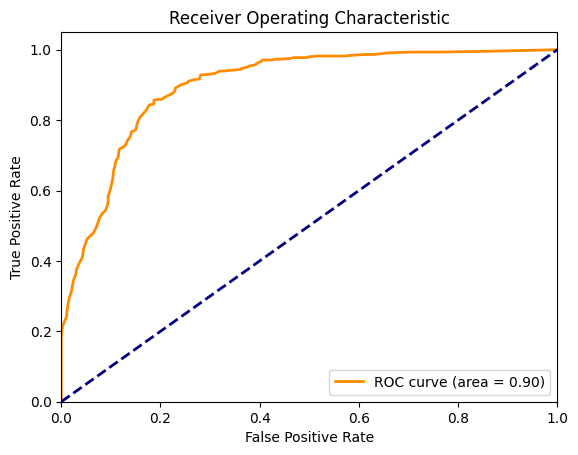

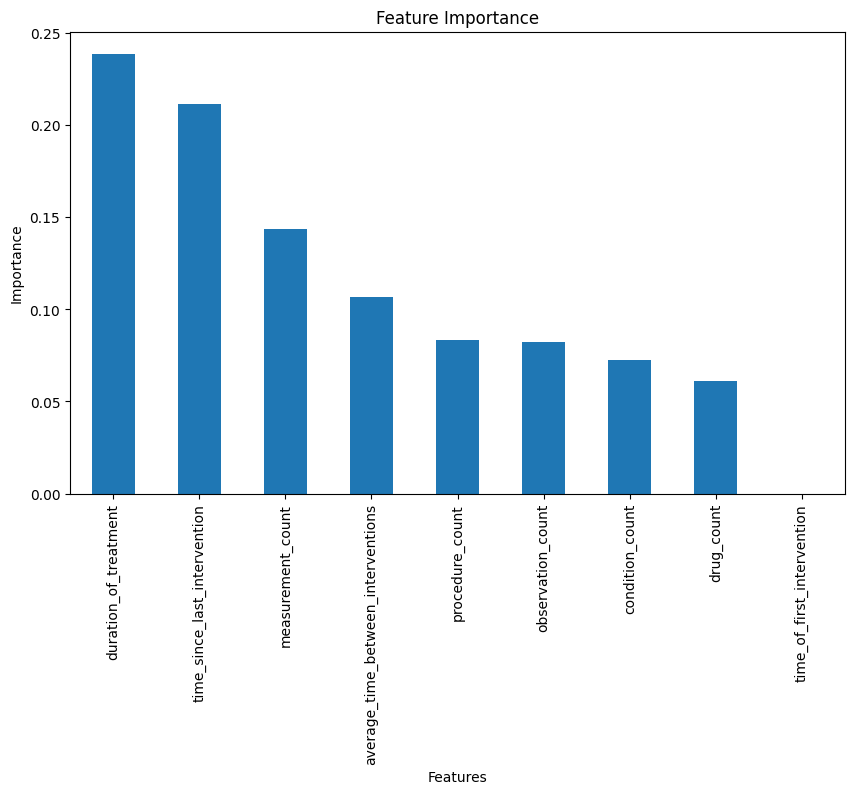

In [18]:
rf_wf1=roc_rf_new_features("../real_data_lc_eval.csv")

In [19]:
rf_new_features_survival_prediction("../real_data_lc_eval.csv",rf_wf1)

,Death_Probability
SUBJECT_ID,
241,0.86
332,0.22
523,0.42
883,0.74
968,0.97
...,...
148728,0.03
148771,0.11
148970,0.07


# Workflow 2 - feature selection by using a graph

The method roc_rf_with_feature_selection_graph(df) takes in the name of a dataframe and trains a random forest classifier on it. The workflow creates a graph from a 20% sample of the data to find the top 100 key values in 'DEFINITION_id'. The data is then modified to have those those values as features and a model is trained on it. The method outputs the ROC AUC score, a ROC graph and the 100 key features and their corresponding weights.

### Make sure to run the other cells then uncomment to run the methods 

Cross-Validated AUC ROC Score: 0.8440595556003425


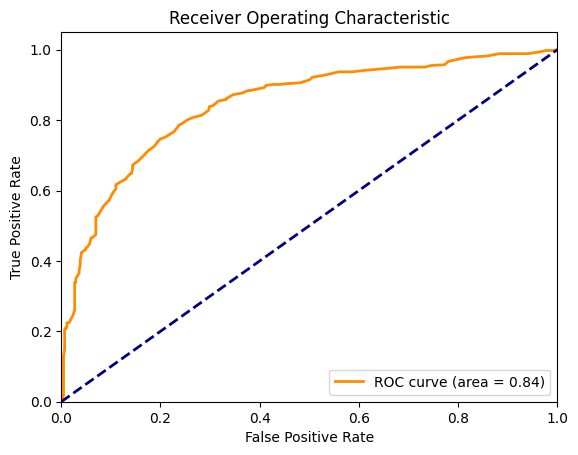

                      importance
definition_id                   
procedure_4300757       0.075422
measurement_40764999    0.044733
measurement_3013869     0.032485
measurement_3013429     0.022490
measurement_3033575     0.020320
condition_261236        0.018725
measurement_3010457     0.018330
measurement_3011948     0.018302
measurement_4216098     0.016957
measurement_3008342     0.016851
procedure_4163872       0.015170
observation_4137910     0.015162
condition_0             0.015149
measurement_3037511     0.014962
measurement_3019897     0.014296
measurement_4148615     0.014035
measurement_4194332     0.014004
measurement_4254663     0.013684
measurement_3020564     0.013481
measurement_3028615     0.013313
procedure_4187078       0.013178
measurement_0           0.012987
observation_4089050     0.012486
observation_4302396     0.012461
measurement_4208414     0.012356
measurement_4118986     0.011932
measurement_4046263     0.011478
measurement_3027388     0.011213
measuremen

In [20]:
rf_wf2=roc_rf_with_feature_selection_graph("../real_data_lc_eval.csv")

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
import networkx as nx

# Code for workflow 1

In [5]:
def prepare_features_and_labels(filename):
    
    df=pd.read_csv(filename)

    # Extract general categories and append '_count' only if DEFINITION_ID contains '_'
    df['category'] = df.apply(lambda row: row['DEFINITION_ID'].split('_')[0] + '_count' if '_' in row['DEFINITION_ID'] else row['DEFINITION_ID'].split('_')[0], axis=1)

    # Step 2: Count occurrences of each category per patient
    category_counts = df.pivot_table(index='SUBJECT_ID', columns='category', aggfunc='size', fill_value=0)

    # Step 3: Calculate time-based features
    df['time_of_first_intervention'] = df.groupby('SUBJECT_ID')['TIME'].transform('min')
    df['time_since_last_intervention'] = df.groupby('SUBJECT_ID')['TIME'].transform('max')
    df['duration_of_treatment'] = df['time_since_last_intervention'] - df['time_of_first_intervention']
    df['average_time_between_interventions'] = df.groupby('SUBJECT_ID')['TIME'].transform(lambda x: x.diff().mean() if len(x) > 1 else 0)

    # Aggregate these features into a single dataframe, ensuring one row per patient
    time_features = df.groupby('SUBJECT_ID')[['time_of_first_intervention', 'time_since_last_intervention', 
                                              'duration_of_treatment', 'average_time_between_interventions']].first().reset_index()

    # Combine counts of categories with time-based features
    features_data = pd.merge(category_counts, time_features, on='SUBJECT_ID')

    # Step 4: Identify 'death' events and create the binary target variable
    death_events = df[df['DEFINITION_ID'] == 'death']['SUBJECT_ID'].unique()
    features_data['death'] = features_data['SUBJECT_ID'].isin(death_events).astype(int)

    # Drop 'SUBJECT_ID' as it is not a feature
    features_data.drop('SUBJECT_ID', axis=1, inplace=True)

    # Split the combined data into features and labels
    X = features_data.drop('death', axis=1)
    y = features_data['death']
    
    return X, y

def rf_new_features_survival_prediction(data, rf_classifier):
    
    df=pd.read_csv(data)
    
    df = df[(df['DEFINITION_ID'] != 'death')]
    # Extract general categories from DEFINITION_ID and append '_count'
    df['category'] = df.apply(lambda row: row['DEFINITION_ID'].split('_')[0] + '_count' if '_' in row['DEFINITION_ID'] else row['DEFINITION_ID'].split('_')[0], axis=1)
    # Step 2: Count occurrences of each category per patient
    category_counts = df.pivot_table(index='SUBJECT_ID', columns='category', aggfunc='size', fill_value=0)
     # Step 3: Calculate time-based features
    df['time_of_first_intervention'] = df.groupby('SUBJECT_ID')['TIME'].transform('min')
    df['time_since_last_intervention'] = df.groupby('SUBJECT_ID')['TIME'].transform('max')
    df['duration_of_treatment'] = df['time_since_last_intervention'] - df['time_of_first_intervention']
    df['average_time_between_interventions'] = df.groupby('SUBJECT_ID')['TIME'].transform(lambda x: x.diff().mean() if len(x) > 1 else 0)

    # Aggregate these features into a single dataframe, ensuring one row per patient
    time_features = df.groupby('SUBJECT_ID')[['time_of_first_intervention', 'time_since_last_intervention', 
                                              'duration_of_treatment', 'average_time_between_interventions']].first().reset_index()
        # Combine counts of categories with time-based features
    features_data = pd.merge(category_counts, time_features, on='SUBJECT_ID')
    
    # Keep 'SUBJECT_ID' for indexing
    subject_ids = features_data['SUBJECT_ID']

    # Drop 'SUBJECT_ID' as it is not a feature for prediction
    features_data.drop('SUBJECT_ID', axis=1, inplace=True)
    
    # Make predictions
    y_pred_proba_validation = rf_classifier.predict_proba(features_data)[:, 1]

    # Create a DataFrame for the predictions with SUBJECT_ID as the index
    predictions_df = pd.DataFrame(y_pred_proba_validation, index=subject_ids, columns=['Death_Probability'])

    return predictions_df



In [6]:
def roc_rf_new_features(data):
    X, y = prepare_features_and_labels(data)

    rf_classifier = RandomForestClassifier(random_state=42)

    # Perform 5-fold cross-validation and obtain predicted probabilities
    y_pred_proba_cv = cross_val_predict(rf_classifier, X, y, cv=5, method='predict_proba')[:, 1]

    # Calculate the AUC-ROC score using cross-validated predictions
    auc_roc_cv = roc_auc_score(y, y_pred_proba_cv)
    print(f"Cross-Validated AUC ROC Score: {auc_roc_cv}")

    # Calculate the ROC curve using cross-validated predictions
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_cv)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Train the classifier on the entire dataset for feature importance
    rf_classifier.fit(X, y)

    # Extract and plot feature importances
    feature_importances = rf_classifier.feature_importances_
    importances = pd.Series(feature_importances, index=X.columns)
    sorted_importances = importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sorted_importances.plot(kind='bar')
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()
    
    return rf_classifier


# Code for workflow 2

In [7]:
def prepare_data_feature_selection(data, top_key_players):
    
    
# Recreate the pivot table for the development dataset
    pivot_data = data.pivot_table(index='SUBJECT_ID', columns='DEFINITION_ID', values='TIME', aggfunc='first')


# Correctly identify the 'death' entries within the 'DEFINITION_ID' column and assign the binary label
# '1' for death within a year and '0' for survival
    death_events = data[data['DEFINITION_ID'] == 'death']['SUBJECT_ID'].unique()
    pivot_data['death'] = pivot_data.index.isin(death_events).astype(int)
    
    

# Drop the 'death' column from features
    pivot_data_features = pivot_data.drop('death', axis=1)
    pivot_data_label = pivot_data['death']
    
# We will create a new dataframe using only the key features identified by the graph analysis
    key_features = [feature for feature, centrality in top_key_players]

# Filter the pivot table to include only key features for model training

    key_features_data = pivot_data_features[key_features]

# Since we have NaN values (where interventions did not occur), we will impute these with 0
# indicating that the intervention did not happen for that patient

    imputer = SimpleImputer(strategy='constant', fill_value=0)

    key_features_data_imputed = imputer.fit_transform(key_features_data)

# Scale the feature data
    scaler = StandardScaler()
    key_features_data_scaled = scaler.fit_transform(key_features_data_imputed)
    
    return key_features_data_scaled, pivot_data_label, key_features



In [8]:
def roc_rf_with_feature_selection_graph(data):
    data=pd.read_csv(data)
    # Sample a subset of the data to create a smaller graph for analysis
    # Since the data may be ordered by SUBJECT_ID, we shuffle the data to get a random sample
    data_sample = data.sample(frac=1, random_state=1)
    data_sample.reset_index(drop=True, inplace=True)
    
    # Let's take a sample of 20% of the data to make the graph computation tractable
    sample_size = int(0.2 * len(data_sample))
    data_sample = data_sample.head(sample_size)
    
    # Create a new graph from the sampled data
    G_sample = nx.Graph()
    
    # Add nodes and edges from the sampled dataset
    for index, row in data_sample.iterrows():
        # Add node if it doesn't exist
        if not G_sample.has_node(row['DEFINITION_ID']):
            G_sample.add_node(row['DEFINITION_ID'])
            
        # Since the data is ordered by time for each SUBJECT_ID, we can link sequential interventions
        if index > 0 and data_sample.iloc[index - 1]['SUBJECT_ID'] == row['SUBJECT_ID']:
            prev_definition_id = data_sample.iloc[index - 1]['DEFINITION_ID']
            # If edge does not exist, add with weight 1, otherwise increase weight
            if not G_sample.has_edge(prev_definition_id, row['DEFINITION_ID']):
                G_sample.add_edge(prev_definition_id, row['DEFINITION_ID'], weight=1)
            else:
                G_sample[prev_definition_id][row['DEFINITION_ID']]['weight'] += 1
    # Calculate centrality measures on the sample graph again
    degree_centrality_sample = nx.degree_centrality(G_sample)
    betweenness_centrality_sample = nx.betweenness_centrality(G_sample)
    closeness_centrality_sample = nx.closeness_centrality(G_sample)
    
    # Identify key players using degree centrality from the sample graph graph
    key_players_by_degree = sorted(degree_centrality_sample.items(), key=lambda item: item[1], reverse=True)
    top_key_players = key_players_by_degree[:100]
    
    
    X,y,key_features = prepare_data_feature_selection(data, top_key_players)    
    
    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)

   # Perform 5-fold cross-validation and obtain predicted probabilities
    y_pred_proba_cv = cross_val_predict(rf_classifier, X, y, cv=5, method='predict_proba')[:, 1]

    # Calculate the AUC-ROC score using cross-validated predictions
    auc_roc_cv = roc_auc_score(y, y_pred_proba_cv)
    print(f"Cross-Validated AUC ROC Score: {auc_roc_cv}")

    # Calculate the ROC curve using cross-validated predictions
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_cv)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Train the classifier on the entire dataset for feature importance
    rf_classifier.fit(X, y)

    # Extract and plot feature importances
    # Extract feature importances from the trained RandomForest model
    feature_importances = rf_classifier.feature_importances_
    # Create a series with feature names and their importance scores
    importances = pd.Series(feature_importances, index=key_features)
    # Sort the feature importances in descending order
    sorted_importances = importances.sort_values(ascending=False)
    # Rename the index and the series for clarity
    sorted_importances.index.name = 'definition_id'
    sorted_importances.name = 'importance'
    # Set option to display all rows of the series
    pd.set_option('display.max_rows', None)
    # Print the series
    print(sorted_importances.to_frame())
    
    return rf_classifier

In [9]:
#X, y = prepare_features_and_labels(data)
#X_validation, y_validation = prepare_features_and_labels(validation)

# Define the parameter grid to search
#param_grid = {
 #   'n_estimators': [100, 200, 300],  # Number of trees in the forest
 #   'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
 #   'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
 #   'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    # Add other parameters here if you want
#}

# Initialize the RandomForestClassifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier, parameter grid, and desired scoring metric
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                       #    cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit GridSearchCV to the training data
#grid_search.fit(X, y)



In [10]:

# Prepare the features and labels
#X, y = prepare_features_and_labels(data)
#X_validation, y_validation = prepare_features_and_labels(validation)

# Define the parameter distribution to sample from
#param_dist = {
 #   'n_estimators': [50, 150, 250, 350, 450],  # Extended range of trees in the forest
 #   'max_depth': [None, 5, 15, 25, 35, 45],    # Extended range for maximum depth of the tree
 #   'min_samples_split': [2, 5, 7, 15, 20],    # Different values for min samples to split
 #   'min_samples_leaf': [1, 2, 4, 6, 8],        # Different values for min samples at a leaf
 #   'bootstrap': [True, False],                 # Whether bootstrap samples are used
 #   'max_features': [None, 'sqrt', 'log2']    # Number of features to consider at every split
    # You can add more parameters here
#}

# Initialize the RandomForestClassifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the classifier, parameter distribution, and desired scoring metric
#random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, 
 #                                  n_iter=100, cv=5, n_jobs=-1, scoring='roc_auc', 
#                                 random_state=42, verbose=2)

# Fit RandomizedSearchCV to the training data
#random_search.fit(X, y)


In [11]:
# Get the best estimator
#best_rf_classifier = random_search.best_estimator_

# Optionally, evaluate on the validation set
#X_validation = X_validation.reindex(columns=X.columns, fill_value=0)  # Ensuring column match
#y_pred_proba_validation = best_rf_classifier.predict_proba(X_validation)[:, 1]
#auc_roc_validation = roc_auc_score(y_validation, y_pred_proba_validation)

#print("Best Parameters:", random_search.best_params_)
#print("Best AUC-ROC on Validation:", auc_roc_validation)


In [12]:
# Compute precision and recall values
#precision, recall, _ = precision_recall_curve(y_validation, y_pred_proba_validation)

# Compute the area under the precision-recall curve
#auc_score = auc(recall, precision)

# Plotting the Precision-Recall curve
#plt.figure(figsize=(8, 6))
#plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc_score)
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Precision-Recall Curve')
#plt.legend(loc="lower left")
#plt.show()


In [13]:
# Compute the calibration curve
#prob_true, prob_pred = calibration_curve(y_validation, y_pred_proba_validation, n_bins=10, strategy='uniform')

# Plotting the Calibration curve
#plt.figure(figsize=(8, 6))
#plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
#plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
#plt.xlabel('Mean predicted probability')
#plt.ylabel('Fraction of positives')
#plt.title('Calibration Curve')
#plt.legend()
#plt.show()
